PROBLEM STATEMENT:


This report looks at bank transaction data to understand how money is received and spent. The data includes details like the date of each transaction, the type of transaction, the amount, and account information. These details help show how money moves in and out of the account over time.

The main aim is to find patterns in spending and deposits, check for anything unusual, and understand overall financial habits. By studying the data carefully, we can get useful information that can help in managing money better.

This report will share the findings in a simple and clear way so that the results are easy to understand and use.


CODE:

In [1]:
import os

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
os.getcwd()

'C:\\Users\\saina'

In [6]:
os.chdir("C:\\Users\\saina\\OneDrive\\Desktop")

In [7]:
bank=pd.read_csv("bank_transactions.csv")

In [8]:
bank

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


INFORMATION:

In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [10]:
bank.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [11]:
bank.shape

(1048567, 9)

In [12]:
bank.isnull

<bound method DataFrame.isnull of         TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
0                  T1   C5841053     10/1/94          F     JAMSHEDPUR   
1                  T2   C2142763      4/4/57          M        JHAJJAR   
2                  T3   C4417068    26/11/96          F         MUMBAI   
3                  T4   C5342380     14/9/73          F         MUMBAI   
4                  T5   C9031234     24/3/88          F    NAVI MUMBAI   
...               ...        ...         ...        ...            ...   
1048562      T1048563   C8020229      8/4/90          M      NEW DELHI   
1048563      T1048564   C6459278     20/2/92          M         NASHIK   
1048564      T1048565   C6412354     18/5/89          M      HYDERABAD   
1048565      T1048566   C6420483     30/8/78          M  VISAKHAPATNAM   
1048566      T1048567   C8337524      5/3/84          M           PUNE   

         CustAccountBalance TransactionDate  TransactionTime  \
0            

READING DATA:

In [44]:
bank[bank["CustLocation"]=="MUMBAI"]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
2,3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
6,7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
9,10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11
...,...,...,...,...,...,...,...,...,...
1048513,1048514,C2878191,3/7/83,M,MUMBAI,133410.42,18/9/16,182840,590.00
1048518,1048519,C3211718,26/5/91,M,MUMBAI,5518.13,18/9/16,185706,3352.00
1048527,1048528,C6629120,10/12/89,M,MUMBAI,6428.08,18/9/16,183953,139.00
1048540,1048541,C1528025,1/1/1800,M,MUMBAI,230894.59,18/9/16,182331,290.00


In [14]:
bank[bank["CustGender"]=="F"]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.0
...,...,...,...,...,...,...,...,...,...
1048549,T1048550,C4819452,30/10/90,F,THANE THANE,1600.14,18/9/16,184226,1094.0
1048552,T1048553,C5091732,21/8/71,F,NEW DELHI,235620.05,18/9/16,184234,1058.0
1048556,T1048557,C3414578,10/9/90,F,GURGAON,27592.70,18/9/16,184932,2000.0
1048557,T1048558,C6912058,24/12/83,F,KOLKATA,2751.87,18/9/16,184320,615.0


In [15]:
bank[(bank["CustGender"]=="F")&(bank["CustLocation"]=="MUMBAI")]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
33,T34,C2043652,25/7/79,F,MUMBAI,123781.90,3/8/16,182714,6800.00
66,T67,C8417574,17/7/90,F,MUMBAI,224685.48,4/8/16,12648,339.92
...,...,...,...,...,...,...,...,...,...
1048298,T1048299,C6413675,24/11/81,F,MUMBAI,10518.12,18/9/16,180255,1903.00
1048307,T1048308,C5024671,22/4/83,F,MUMBAI,225071.11,18/9/16,181523,370.00
1048321,T1048322,C3510139,25/5/69,F,MUMBAI,2282.20,18/9/16,184647,392.75
1048392,T1048393,C8819392,22/9/93,F,MUMBAI,21869.97,18/9/16,195713,180.00


In [16]:
bank[bank["TransactionAmount (INR)"]>=10000]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
12,T13,C6339347,13/6/78,M,AHMEDABAD,32274.78,2/8/16,203834,12300.0
46,T47,C8934588,23/10/81,M,JAIPUR,5055.18,3/8/16,223146,13846.0
49,T50,C5242591,1/12/82,M,BURDWAN,22525.66,5/8/16,133136,27990.0
137,T138,C4234628,18/3/88,M,MUMBAI,3186.20,4/8/16,95332,10885.0
...,...,...,...,...,...,...,...,...,...
1048457,T1048458,C4322243,15/12/67,F,DELHI,746.11,18/9/16,85410,14498.0
1048492,T1048493,C2445625,2/10/71,M,PALI,491344.05,18/9/16,182616,15000.0
1048517,T1048518,C3541869,18/10/87,F,NEW DELHI,46245.41,18/9/16,185632,20000.0
1048521,T1048522,C1942313,23/2/99,M,BAGHPAT,6017.81,18/9/16,184842,20050.0


In [17]:
bank[bank["CustLocation"]!="PALI"]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [18]:
bank[(bank["TransactionAmount (INR)"]>=50000)&(bank["CustGender"]=="M")]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
193,T194,C4325361,1/1/1800,M,KOLKATA,133203.58,7/8/16,93946,100000.0
206,T207,C7675278,1/1/1800,M,NOIDA,1867210.51,7/8/16,144436,137890.0
247,T248,C8738676,1/1/1800,M,RAJPURA,362200.72,21/10/16,151251,53000.0
366,T367,C6784890,10/5/71,M,NOIDA,1441016.64,21/10/16,203410,60000.0
557,T558,C6631437,8/1/89,M,WARANGAL,11614.10,21/10/16,202054,50000.0
...,...,...,...,...,...,...,...,...,...
1044595,T1044596,C1925324,1/1/1800,M,KOLKATA,133203.58,18/9/16,92856,100000.0
1044748,T1044749,C5925366,1/1/1800,M,KOLKATA,157333.33,18/9/16,92657,100000.0
1047497,T1047498,C4725947,1/1/1800,M,DHANBAD,311806.39,18/9/16,92835,100000.0
1048071,T1048072,C8725376,1/1/1800,M,KOLKATA,157333.33,18/9/16,92721,100000.0


In [19]:
bank[(bank["CustLocation"]=="KOLKATA")&(bank["CustAccountBalance"]>=7000)&(bank["CustGender"]=="F")]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
99,T100,C1713934,18/9/77,F,KOLKATA,22588.09,6/8/16,182603,810.0
104,T105,C7924053,15/4/71,F,KOLKATA,77587.52,6/8/16,185409,500.0
269,T270,C2526046,7/1/88,F,KOLKATA,31369.53,21/10/16,151510,1735.0
275,T276,C5741387,2/7/84,F,KOLKATA,56450.72,21/10/16,150740,722.0
819,T820,C2518658,23/7/87,F,KOLKATA,23321.73,21/10/16,194933,730.0
...,...,...,...,...,...,...,...,...,...
1048083,T1048084,C6916257,2/12/92,F,KOLKATA,40831.63,18/9/16,90655,63.0
1048122,T1048123,C1194638,4/6/82,F,KOLKATA,45792.16,18/9/16,182017,2657.0
1048128,T1048129,C1840959,21/10/74,F,KOLKATA,47049.50,18/9/16,185732,592.0
1048240,T1048241,C2419191,11/6/69,F,KOLKATA,34695.29,18/9/16,103701,200.0


In [20]:
bank[bank["CustomerDOB"]=="18/9/77"]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
99,T100,C1713934,18/9/77,F,KOLKATA,22588.09,6/8/16,182603,810.0
27518,T27519,C4313970,18/9/77,F,KOLKATA,22588.09,26/9/16,221632,200.0
65030,T65031,C1413961,18/9/77,F,KOLKATA,22588.09,2/8/16,110959,200.0
91778,T91779,C3813431,18/9/77,M,CHENNAI,181934.62,22/9/16,140036,1031.0
101997,T101998,C7513949,18/9/77,F,KOLKATA,22588.09,6/8/16,94911,200.0
...,...,...,...,...,...,...,...,...,...
1008386,T1008387,C8313960,18/9/77,F,KOLKATA,22588.09,14/9/16,210128,950.0
1012360,T1012361,C6913992,18/9/77,F,KOLKATA,22588.09,13/9/16,194217,630.0
1041252,T1041253,C1313443,18/9/77,M,CHENNAI,181934.62,18/9/16,123755,1320.0
1043613,T1043614,C1513960,18/9/77,F,KOLKATA,22588.09,18/9/16,15153,200.0


In [21]:
bank[(bank["TransactionTime"]<=182603)&(bank["TransactionDate"]=="18/9/16")]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
1032337,T1032338,C5629481,1/5/74,M,GURGAON,11738.35,18/9/16,171048,2818.00
1032338,T1032339,C7163083,28/2/78,M,BANGLORE,213688.08,18/9/16,170904,1172.00
1032339,T1032340,C4422158,10/11/77,F,DEHRADUN,17178.27,18/9/16,171556,2297.00
1032340,T1032341,C7419638,28/6/81,F,MUMBAI,28687.72,18/9/16,171311,1100.00
1032341,T1032342,C8141068,24/4/75,F,ANAND,1475.63,18/9/16,172702,2440.31
...,...,...,...,...,...,...,...,...,...
1048524,T1048525,C7227746,4/12/90,M,THANE,218207.57,18/9/16,175625,726.80
1048539,T1048540,C7411577,14/10/89,F,BANGALORE,10662.67,18/9/16,182350,695.00
1048540,T1048541,C1528025,1/1/1800,M,MUMBAI,230894.59,18/9/16,182331,290.00
1048544,T1048545,C3712582,5/10/71,M,MUMBAI,25414.52,18/9/16,182015,400.00


In [22]:
bank[(bank["TransactionTime"]<=182603)&(bank["TransactionDate"]>="18/9/16")&(bank["CustGender"]=="M")]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.0
22,T23,C7018081,1/1/1800,M,WAYS PANCHKUVA AHMEDABAD,143.07,3/8/16,104718,110.0
23,T24,C5830215,1/10/86,M,LUCKNOW,12868.42,3/8/16,125629,291.0
25,T26,C5521085,24/2/93,M,GURGAON,3297.74,3/8/16,160533,242.0
...,...,...,...,...,...,...,...,...,...
1048523,T1048524,C4030853,8/1/83,M,ROAD KHARAGPUR,11533.08,18/9/16,175131,49.0
1048524,T1048525,C7227746,4/12/90,M,THANE,218207.57,18/9/16,175625,726.8
1048540,T1048541,C1528025,1/1/1800,M,MUMBAI,230894.59,18/9/16,182331,290.0
1048544,T1048545,C3712582,5/10/71,M,MUMBAI,25414.52,18/9/16,182015,400.0


In [23]:
bank.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


In [24]:
bank.tail(7)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
1048560,T1048561,C5028150,24/5/80,M,PUNE,464.87,18/9/16,184632,3000.0
1048561,T1048562,C1034220,19/11/92,M,BANGALORE,1212.70,18/9/16,184734,1500.0
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0
1048566,T1048567,C8337524,5/3/84,M,PUNE,75734.42,18/9/16,181222,1166.0


In [25]:
bank["CustLocation"].unique()

array(['JAMSHEDPUR', 'JHAJJAR', 'MUMBAI', ..., 'KARANJIA',
       'NR HERITAGE FRESH HYDERABAD', 'IMPERIA THANE WEST'],
      shape=(9356,), dtype=object)

In [26]:
bank["CustLocation"].value_counts()

CustLocation
MUMBAI                           103595
NEW DELHI                         84928
BANGALORE                         81555
GURGAON                           73818
DELHI                             71019
                                  ...  
SAHIBGANJ                             1
24 PARGANAS SOUTH 24 PARGANAS         1
PREMISES KALYANI NAGAR PUNE           1
ARRAH                                 1
AREA WHITE FIELD BANGALORE            1
Name: count, Length: 9355, dtype: int64

MANIPULATING DATA:

In [9]:
bank["TransactionTime"].astype("int32")

0          143207
1          141858
2          142712
3          142714
4          181156
            ...  
1048562    184824
1048563    183734
1048564    183313
1048565    184706
1048566    181222
Name: TransactionTime, Length: 1048567, dtype: int32

In [10]:
bank["TransactionTime"]=bank["TransactionTime"].astype("int32")

In [11]:
bank["TransactionID"]=bank["TransactionID"].str.replace("T","0")

In [12]:
bank

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,01,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,02,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,03,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,04,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,05,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,01048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,01048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,01048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,01048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [13]:
bank["TransactionID"].astype("int32")

0                1
1                2
2                3
3                4
4                5
            ...   
1048562    1048563
1048563    1048564
1048564    1048565
1048565    1048566
1048566    1048567
Name: TransactionID, Length: 1048567, dtype: int32

In [14]:
bank["TransactionID"]=bank["TransactionID"].astype("int32")

In [15]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  int32  
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int32  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int32(2), object(5)
memory usage: 64.0+ MB


In [16]:
bank["TransactionID"]=bank["TransactionID"].replace(0," ")

In [17]:
bank

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [18]:
bank.groupby("CustLocation")

In [19]:
bank.groupby("CustLocation")["TransactionTime"]

In [20]:
bank.groupby("CustLocation")["TransactionTime"].sum()

CustLocation
(154) BHASKOLA FARIDABAD          1820387
(BEFORE YMCA BLDG) CHENNAI         151450
(BENAKA MDTS) BANGALORE           2636136
(BRINDA BAN ) KOLKATA             1003171
(DT) HOSUR                        1518849
                                   ...   
ZOPADPATTI TEHSIL KURLA MUMBAI     183612
ZUARINAGAR                         796655
ZULFA DAIRY MUMBAI                 835965
ZUMARI TILAIYA                    1679097
ZUNHEBOTO                          194502
Name: TransactionTime, Length: 9355, dtype: int64

In [39]:
bank.groupby("CustLocation")

In [40]:
bank.groupby("CustLocation")["CustGender"].value_counts()

CustLocation                    CustGender
(154) BHASKOLA FARIDABAD        F             11
(BEFORE YMCA BLDG) CHENNAI      M              1
(BENAKA MDTS) BANGALORE         M             21
(BRINDA BAN ) KOLKATA           M              5
(DT) HOSUR                      M             11
                                              ..
ZOPADPATTI TEHSIL KURLA MUMBAI  M              1
ZUARINAGAR                      M              6
ZULFA DAIRY MUMBAI              M              4
ZUMARI TILAIYA                  F              9
ZUNHEBOTO                       F              1
Name: count, Length: 10958, dtype: int64

In [41]:
bank.groupby("CustGender")

In [42]:
bank.groupby("CustGender")["TransactionDate"].value_counts()

CustGender  TransactionDate
F           13/8/16            7568
            7/8/16             7464
            6/8/16             7437
            3/9/16             7299
            4/9/16             7230
                               ... 
M           21/10/16           2646
            23/9/16            2462
            30/9/16            1377
            16/10/16              2
T           10/9/16               1
Name: count, Length: 111, dtype: int64

GRAPHS:

In [21]:
import matplotlib.pyplot as plt

In [23]:
a=bank.groupby("CustGender")["TransactionAmount (INR)"].sum()

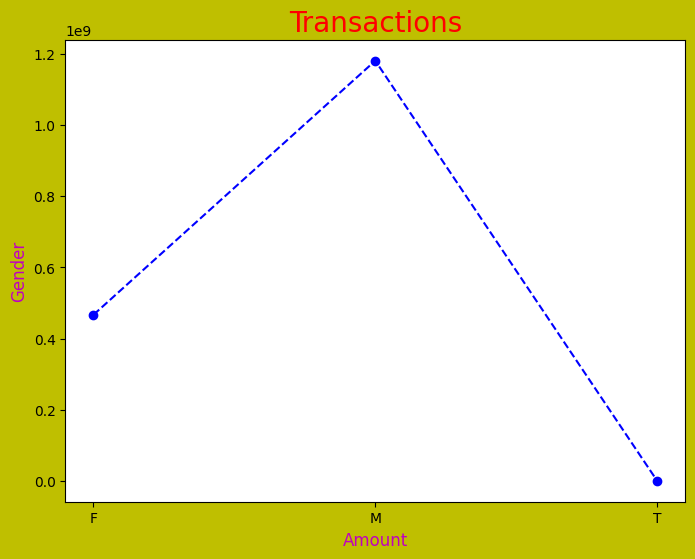

In [122]:
plt.figure(figsize=(8,6),facecolor="y")
plt.xlabel("Amount",fontdict={"color":"m","fontsize":"12"})
plt.ylabel("Gender",fontdict={"color":"m","fontsize":"12"})
plt.title("Transactions",fontdict={"color":"r","fontsize":"20"})
plt.plot(a,"o--b")
plt.show()

This graph shows the total transaction amounts for each gender.
It compares how much money was transacted by females (F), males (M), and others (T).

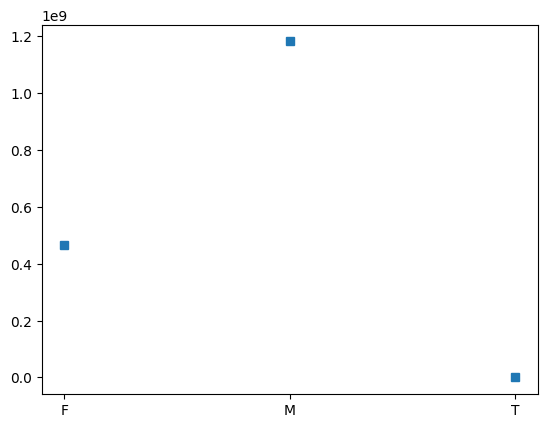

In [24]:
plt.plot(a,"s")

In [39]:
b=bank.groupby("CustGender")["CustAccountBalance"].sum()

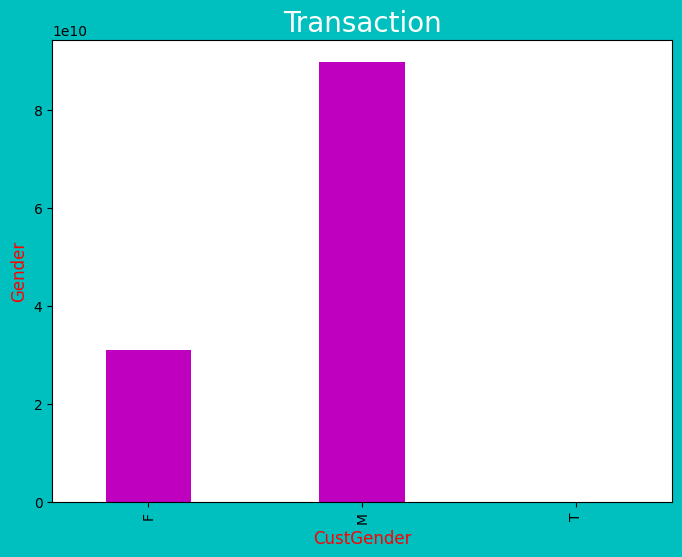

In [43]:
plt.figure(figsize=(8,6),facecolor="c")
plt.title("Transaction",color="w",fontdict={"color":"r","fontsize":"20"})
plt.xlabel("Balance",fontdict={"color":"r","fontsize":"12"})
plt.ylabel("Gender",fontdict={"color":"r","fontsize":"12"})
b.plot(kind="bar",color="m",width=0.4)
plt.show()

The bar graph compares the total balance amounts for each gender.

In [114]:
c=bank["TransactionDate"].head(30)

(array([13.,  8.,  9.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

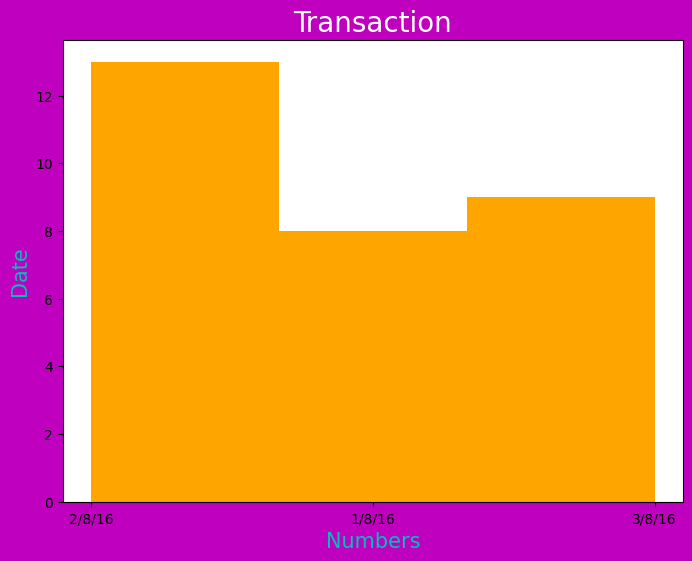

In [138]:
plt.figure(figsize=(8,6),facecolor="m")
plt.title("Transaction",color="w",fontdict={"color":"r","fontsize":"20"})
plt.xlabel("Numbers",fontdict={"color":"c","fontsize":"15"})
plt.ylabel("Date",fontdict={"color":"c","fontsize":"15"})
plt.hist(c,bins=3,color="orange")

The histogram shows the distribution of transaction counts across different number ranges.

In [140]:
p=bank["CustLocation"].value_counts().head(10)

<Axes: ylabel='count'>

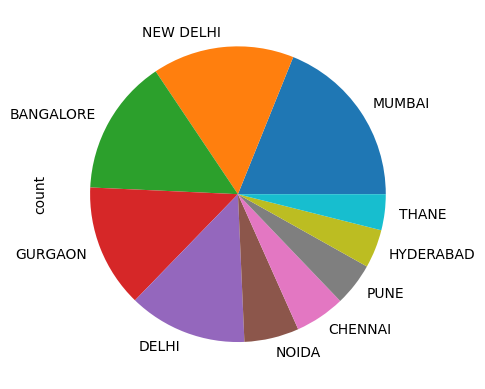

In [142]:
p.plot(kind="pie")

The pie chart displays the share of transactions coming from the top 10 cities, showing which locations have higher or lower transaction counts.


In [25]:
import seaborn as sns

<Axes: xlabel='CustGender', ylabel='TransactionTime'>

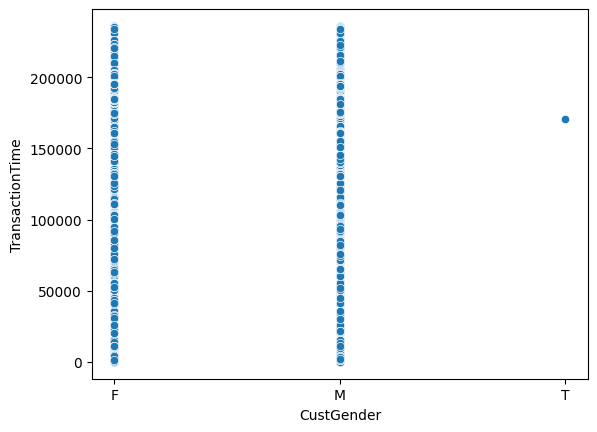

In [46]:
sns.scatterplot(data=bank,x="CustGender",y="TransactionTime")

The scatter plot shows the relationship between customer gender and transaction time, helping to see if certain genders tend to make transactions at specific times.


<Axes: xlabel='TransactionAmount (INR)', ylabel='TransactionTime'>

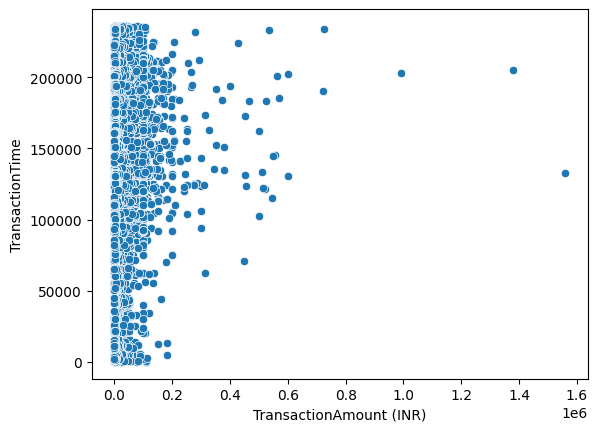

In [47]:
sns.scatterplot(data=bank,x="TransactionAmount (INR)",y="TransactionTime")

The scatter plot compares transaction amount with transaction time, giving an idea of when higher or lower amounts are typically transacted.

<Axes: xlabel='TransactionAmount (INR)', ylabel='TransactionTime'>

C:\Users\saina\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\saina\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


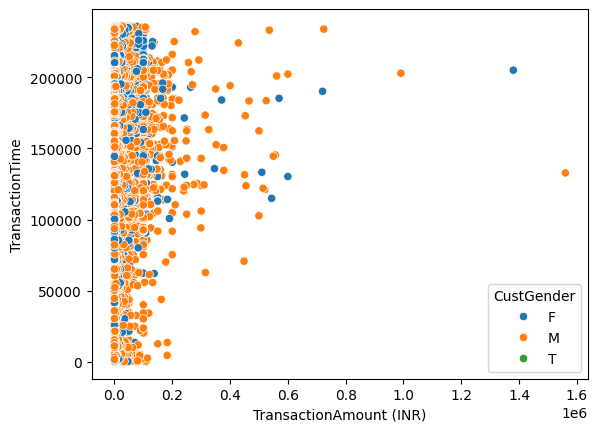

In [48]:
sns.scatterplot(data=bank,x="TransactionAmount (INR)",y="TransactionTime",hue="CustGender")

The scatter plot shows the relationship between transaction amount and transaction time, with points colored by customer gender to compare patterns across genders.


<Axes: xlabel='CustGender', ylabel='TransactionAmount (INR)'>

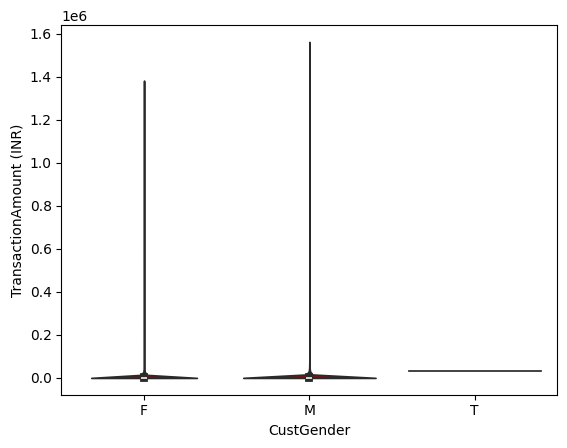

In [12]:
sns.violinplot(data=bank,x="CustGender",y="TransactionAmount (INR)",color="darkred")

The violin plot displays the distribution of transaction amounts for each gender, showing where most transactions fall and highlighting any extreme values.


<Axes: xlabel='CustGender', ylabel='TransactionAmount (INR)'>

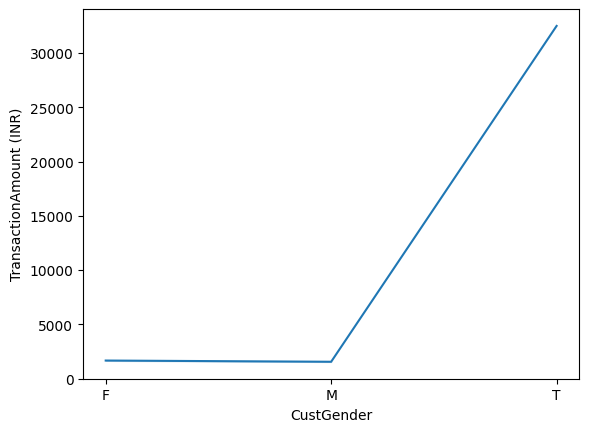

In [17]:
sns.lineplot(data=bank,x="CustGender",y="TransactionAmount (INR)")

The line plot compares the transaction amounts for different genders, helping to see which group has higher or lower amounts on average.

C:\Users\saina\AppData\Local\Temp\ipykernel_24260\3450119697.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=bank,x="TransactionTime",hue="CustGender")


<Axes: xlabel='TransactionTime', ylabel='Density'>

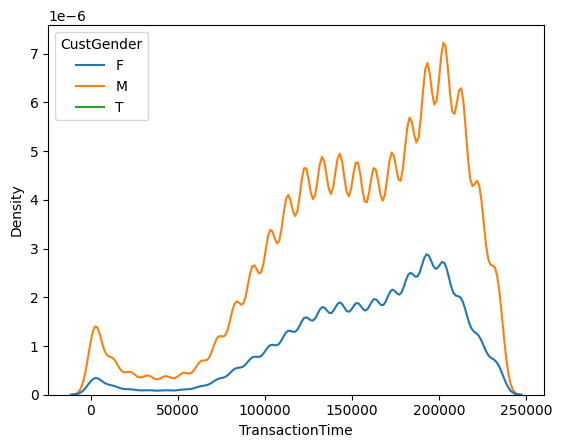

In [18]:
sns.kdeplot(data=bank,x="TransactionTime",hue="CustGender")

The density plot shows how transaction times are distributed for each gender, highlighting the time ranges when transactions are more frequent.


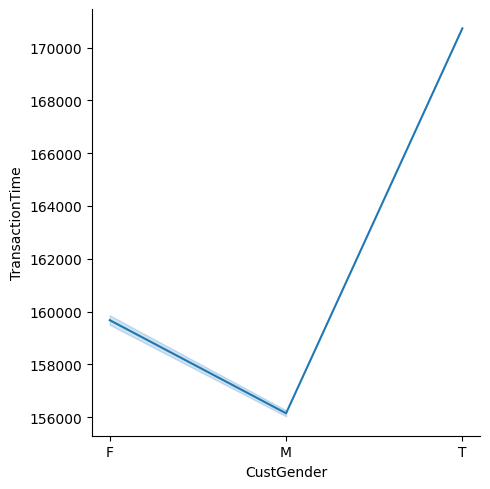

In [26]:
sns.relplot(data=bank,x="CustGender",y="TransactionTime",kind="line")

The line plot compares the average transaction time for each gender, showing differences in when transactions usually occur.


<Axes: xlabel='CustLocation', ylabel='TransactionTime'>

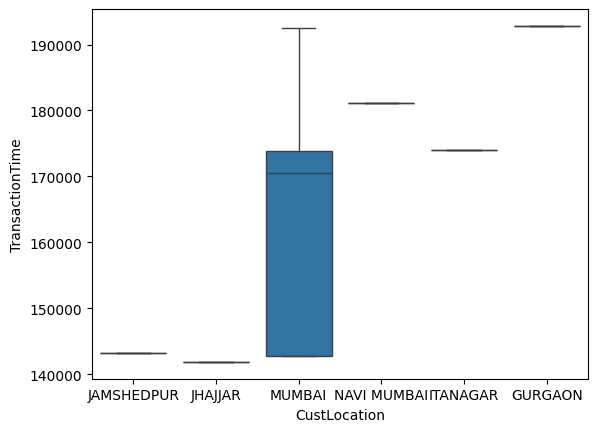

In [28]:
sns.boxplot(data=bank.head(10),x="CustLocation",y="TransactionTime")

The box plot displays the spread of transaction times for the top entries, making it easier to see the range and any unusual values.

<Axes: xlabel='CustGender', ylabel='TransactionAmount (INR)'>

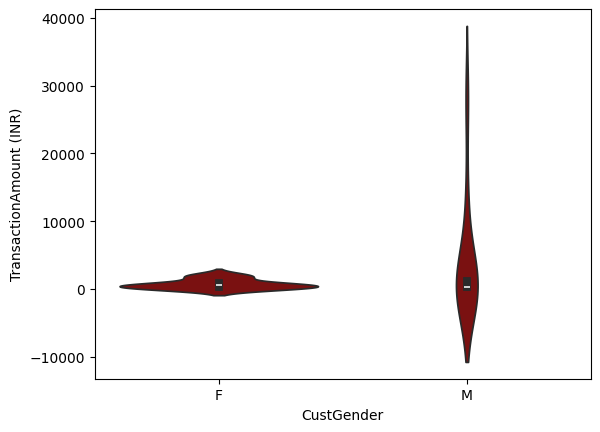

In [29]:
sns.violinplot(data=bank.head(20),x="CustGender",y="TransactionAmount (INR)",color="darkred")

The graph is a violin plot showing the distribution of TransactionAmount (INR) for different CustGender. It shows that males (M) have a wider range of transaction amounts compared to females (F).


<Axes: xlabel='TransactionAmount (INR)', ylabel='TransactionTime'>

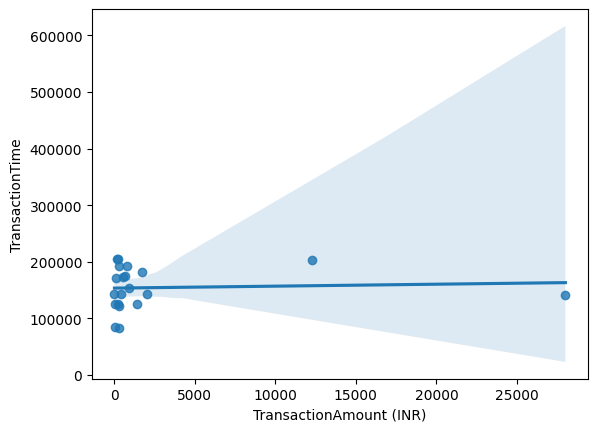

In [32]:
sns.regplot(data=bank.head(20),x="TransactionAmount (INR)",y="TransactionTime")

The graph is a regression plot showing the relationship between TransactionAmount (INR) and TransactionTime. It tries to show if there’s any trend, but the points are mostly clustered with little correlation.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'JAMSHEDPUR'),
  Text(1, 0, 'JHAJJAR'),
  Text(2, 0, 'MUMBAI'),
  Text(3, 0, 'NAVI MUMBAI'),
  Text(4, 0, 'ITANAGAR'),
  Text(5, 0, 'GURGAON'),
  Text(6, 0, 'MOHALI'),
  Text(7, 0, 'GUNTUR'),
  Text(8, 0, 'AHMEDABAD'),
  Text(9, 0, 'THANE'),
  Text(10, 0, 'PUNE'),
  Text(11, 0, 'NEW DELHI'),
  Text(12, 0, 'NO 3 KALYANI NAGAR PUNE'),
  Text(13, 0, 'SECUNDERABAD'),
  Text(14, 0, 'WAYS PANCHKUVA AHMEDABAD'),
  Text(15, 0, 'LUCKNOW'),
  Text(16, 0, 'DELHI'),
  Text(17, 0, 'CHENNAI'),
  Text(18, 0, 'GRAM PANCHAYTH HYDERABAD')])

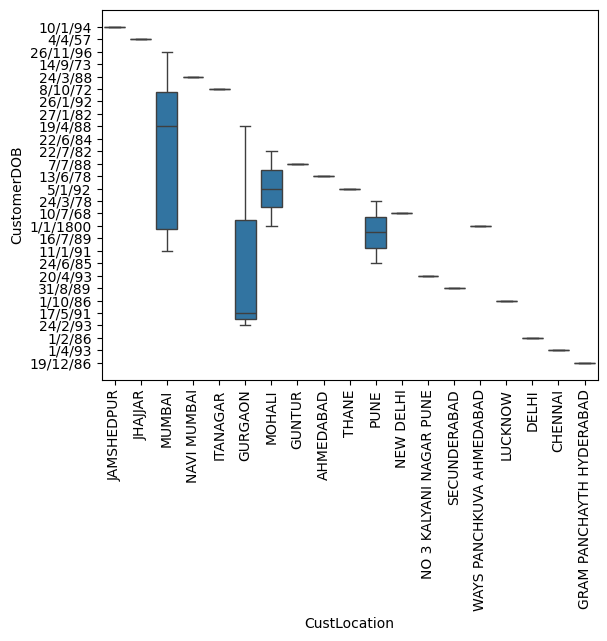

In [37]:
sns.boxplot(data=bank.head(30),x="CustLocation",y="CustomerDOB")
plt.xticks(rotation=90)

The box plot shows the distribution of customer dates of birth (CustDOB) for each customer location (CustLocation) on the x-axis.
It helps compare the age ranges of customers in different locations and spot any unusual values.

CONCLUSION:

The analysis of the bank transaction data provided valuable insights into customer behavior, transaction patterns, and demographic trends. By examining various visualizations such as bar graphs, scatter plots, pie charts, density plots, and box plots, it became easier to identify patterns in transaction amounts, transaction times, and customer demographics. The findings showed clear differences in financial activity between genders, cities, and other categories, highlighting which groups and locations contribute most to the bank’s transactions.

This study also revealed the distribution and range of values, helping to detect unusual or extreme transactions. Patterns in transaction timing and amounts can assist in understanding customer habits, while demographic comparisons offer useful information for targeted financial strategies. Overall, the report provides a well-rounded view of how customers interact with the bank, supporting better decision-making for both operational improvements and customer service enhancement.
